# Auswertung Wegstrecken der Simulation

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import pickle

In [4]:
# Laden der Simulationsergebnisse
path = os.getcwd()+"\\Simulationsergebnisse\\Simulation_Results_3_250k.pickle"
data = pickle.load(open(path, "rb"))

In [5]:
data.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Charge_start,Charge_end
0,0.1,1,1,5,618.0,41,619.0,1.0,0.4,10,NaN,NaN
1,0.2,2,5,3,629.0,42,660.0,31.0,9.7,142,NaN,NaN
2,0.3,3,3,4,802.0,53,989.0,187.0,59.2,1223,NaN,NaN
3,1.1,1,1,5,436.0,29,441.0,5.0,1.6,2,NaN,NaN
4,1.2,2,5,2,443.0,30,460.0,17.0,5.5,1226,NaN,NaN


## Wegstrecken in 2-dimensionaler Liste Speichern 
wege_ij[i-1][j-1] entspricht der Liste aller Wegstrecken vom Zustand i zum Zustand j

In [6]:
# initialisieren 5x5 Liste 
wege_ij = [[0 for i in range(5)] for j in range(5)]

In [7]:
for i in range(1, 6):
    for j in range(1, 6):
        if j == i:
            continue
        # filtern des Dataframes nach Ausgangs- und Zielzustandskombinationen
        filt = (data["Whyfrom"] == i) & (data["Whyto"] == j)
        # speichern der Liste der Distanzen zwischen den Zuständen in entsprechendem Feld
        wege_ij[i-1][j-1] = list(data[filt]["Distance"])

## Visualisieren der Histogramme

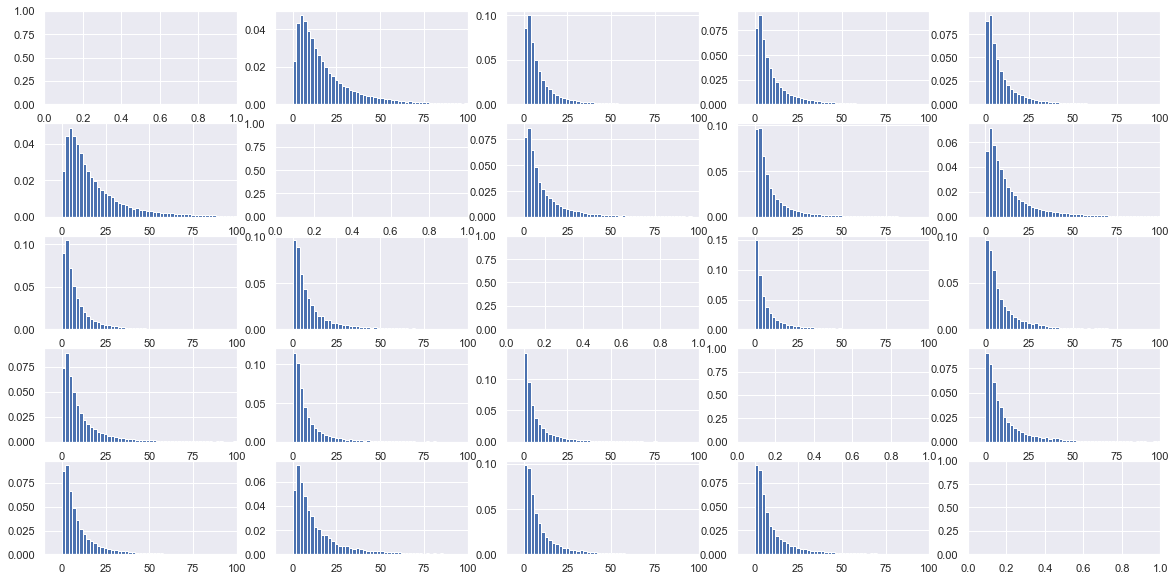

In [8]:
sns.set()
fig, axs = plt.subplots(5, 5, figsize=(20,10))
for i in range(5):
    for j in range(5):
        if i == j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), density=True)
        axs[i][j].set_xlim(-10, 100)

In [9]:
# initialisieren 5x5 Liste für Parameter der Verteilungsfunktion 
shape_ij = [[0 for i in range(5)] for j in range(5)]
scale_ij = [[0 for i in range(5)] for j in range(5)]
loc_ij = [[0 for i in range(5)] for j in range(5)]
pdf_ij = [[0 for i in range(5)] for j in range(5)]
x = np.linspace(0, 500, 1000)

for i in range(5):
    for j in range(5):
        if j == i:
            continue
        shape_ij[i][j], loc_ij[i][j], scale_ij[i][j] = stats.lognorm.fit(wege_ij[i][j], loc=0, scale=5)
        pdf_ij[i][j] = stats.lognorm.pdf(x, s=shape_ij[i][j], loc=loc_ij[i][j], scale=scale_ij[i][j])

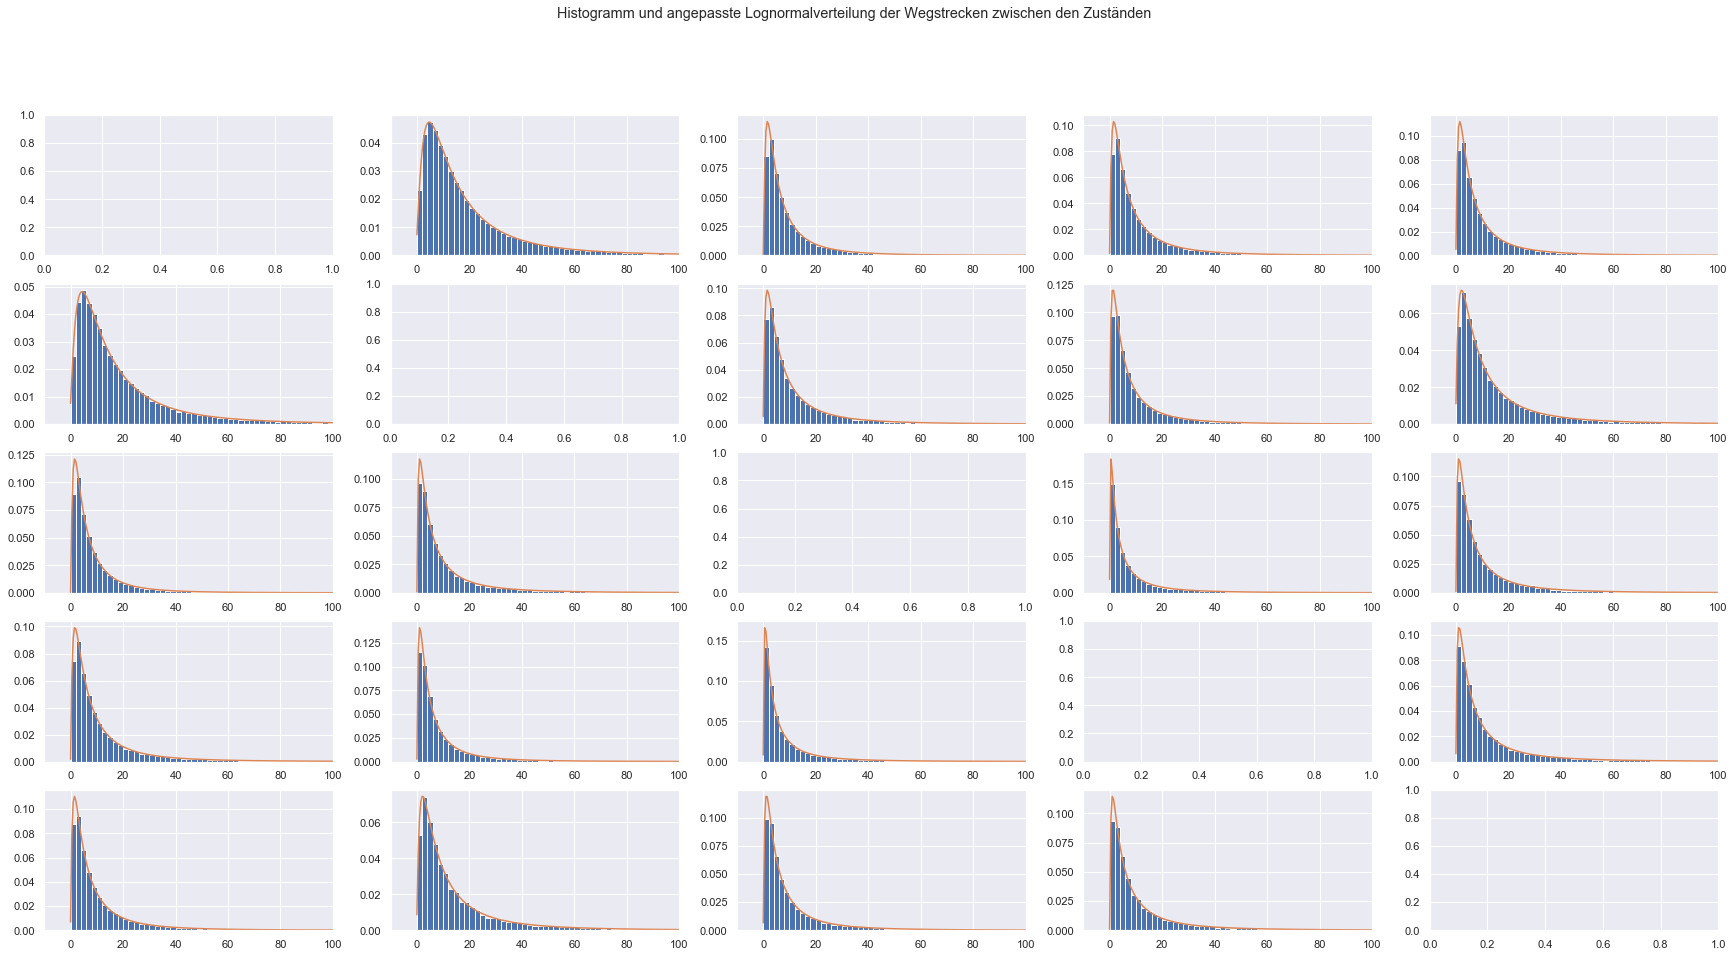

In [10]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), density=True)
        axs[i][j].set_xlim(-10, 100)
        axs[i][j].plot(x, pdf_ij[i][j])
fig.suptitle("Histogramm und angepasste Lognormalverteilung der Wegstrecken zwischen den Zuständen");

# Vergleich mit Verteilungsfunktion der Ausgangsdaten

In [11]:
# Parameter der Ausgangsverteilungsfunktion
dist_wd_shape_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Shape.pickle", "rb"))
dist_wd_scale_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Scale.pickle", "rb"))
dist_wd_loc_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Simulationsdaten\Verteilung_Wegstrecken_Werktage_Loc.pickle", "rb"))

orig_pdf_ij = [[0 for i in range(5)] for j in range(5)]

for i in range(5):
    for j in range(5):
        if j == i:
            continue
        orig_pdf_ij[i][j] = stats.lognorm.pdf(x, s=shape_ij[i][j], loc=loc_ij[i][j], scale=scale_ij[i][j])

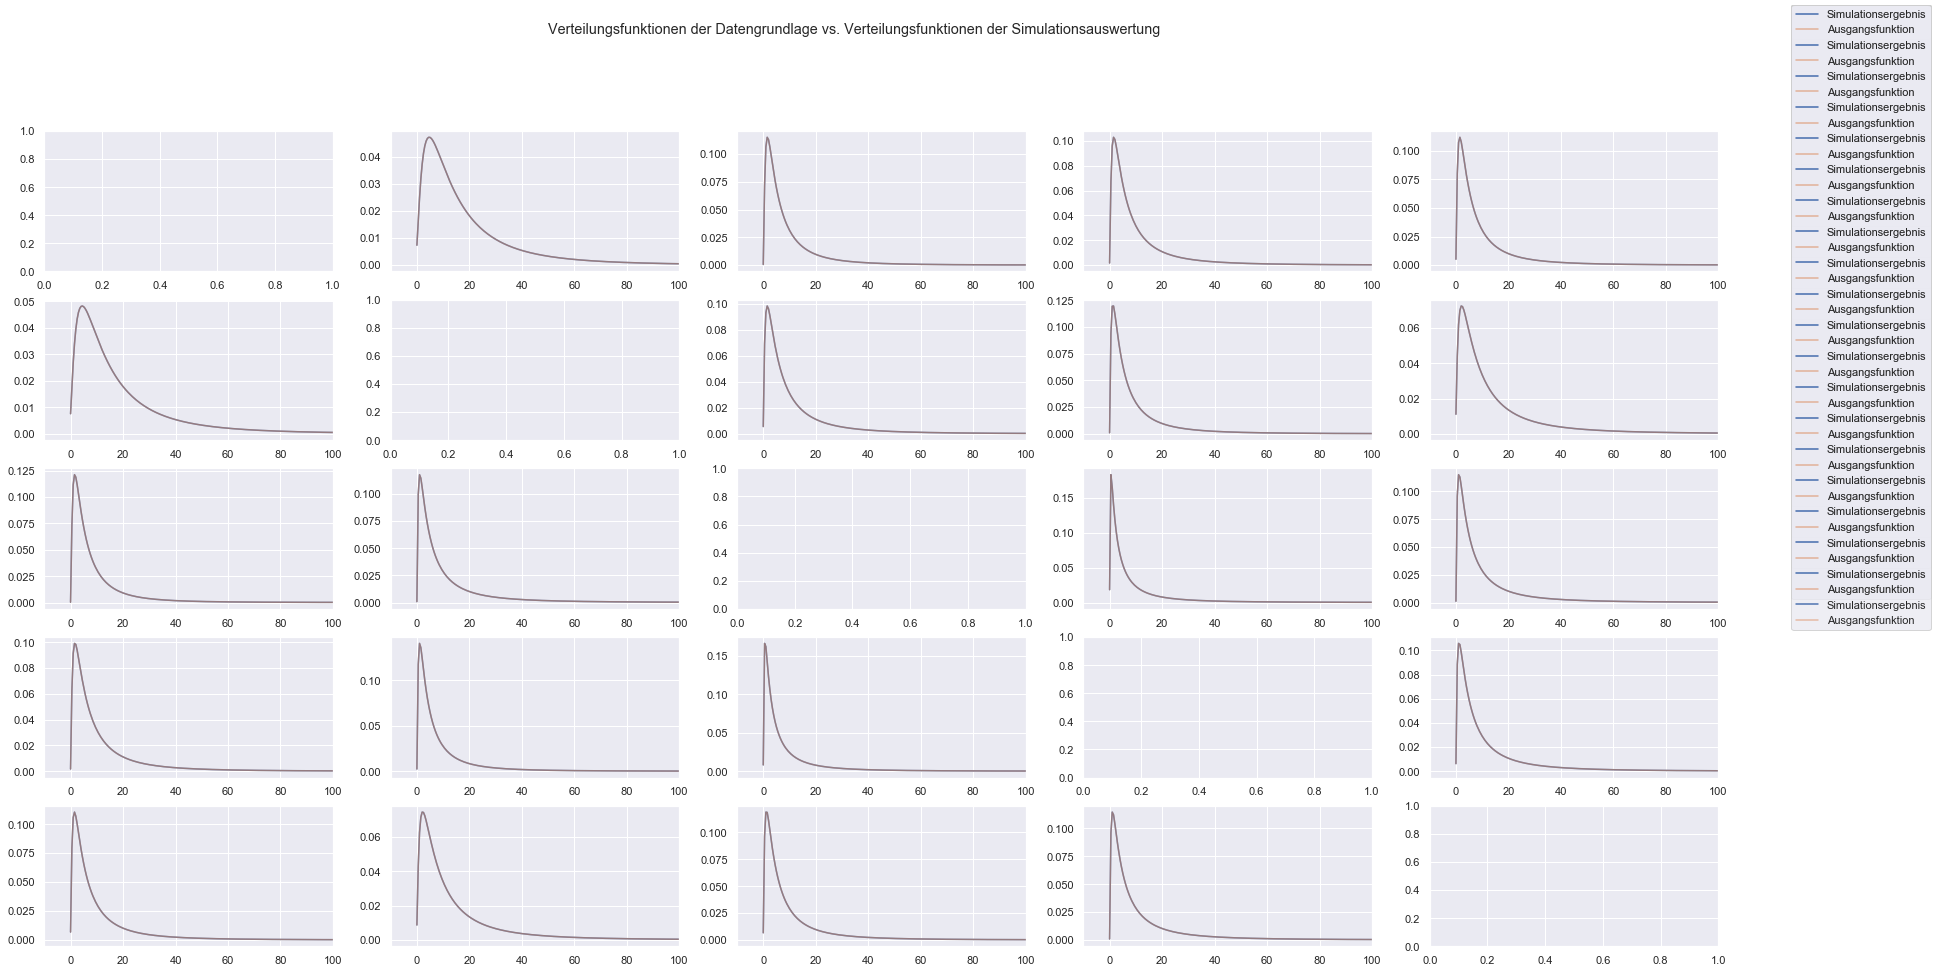

In [12]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].plot(x, pdf_ij[i][j], label="Simulationsergebnis")
        axs[i][j].plot(x, orig_pdf_ij[i][j], label="Ausgangsfunktion", alpha = 0.5)
        axs[i][j].set_xlim(-10, 100)
        fig.legend()
fig.suptitle("Verteilungsfunktionen der Datengrundlage vs. Verteilungsfunktionen der Simulationsauswertung");

# Vergleich der Histogramme der Wegstrecken

In [13]:
orig_wege_ij = pickle.load(open(r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Simulationsdaten\Liste_Wegstrecken_Werktage.pickle", "rb"))

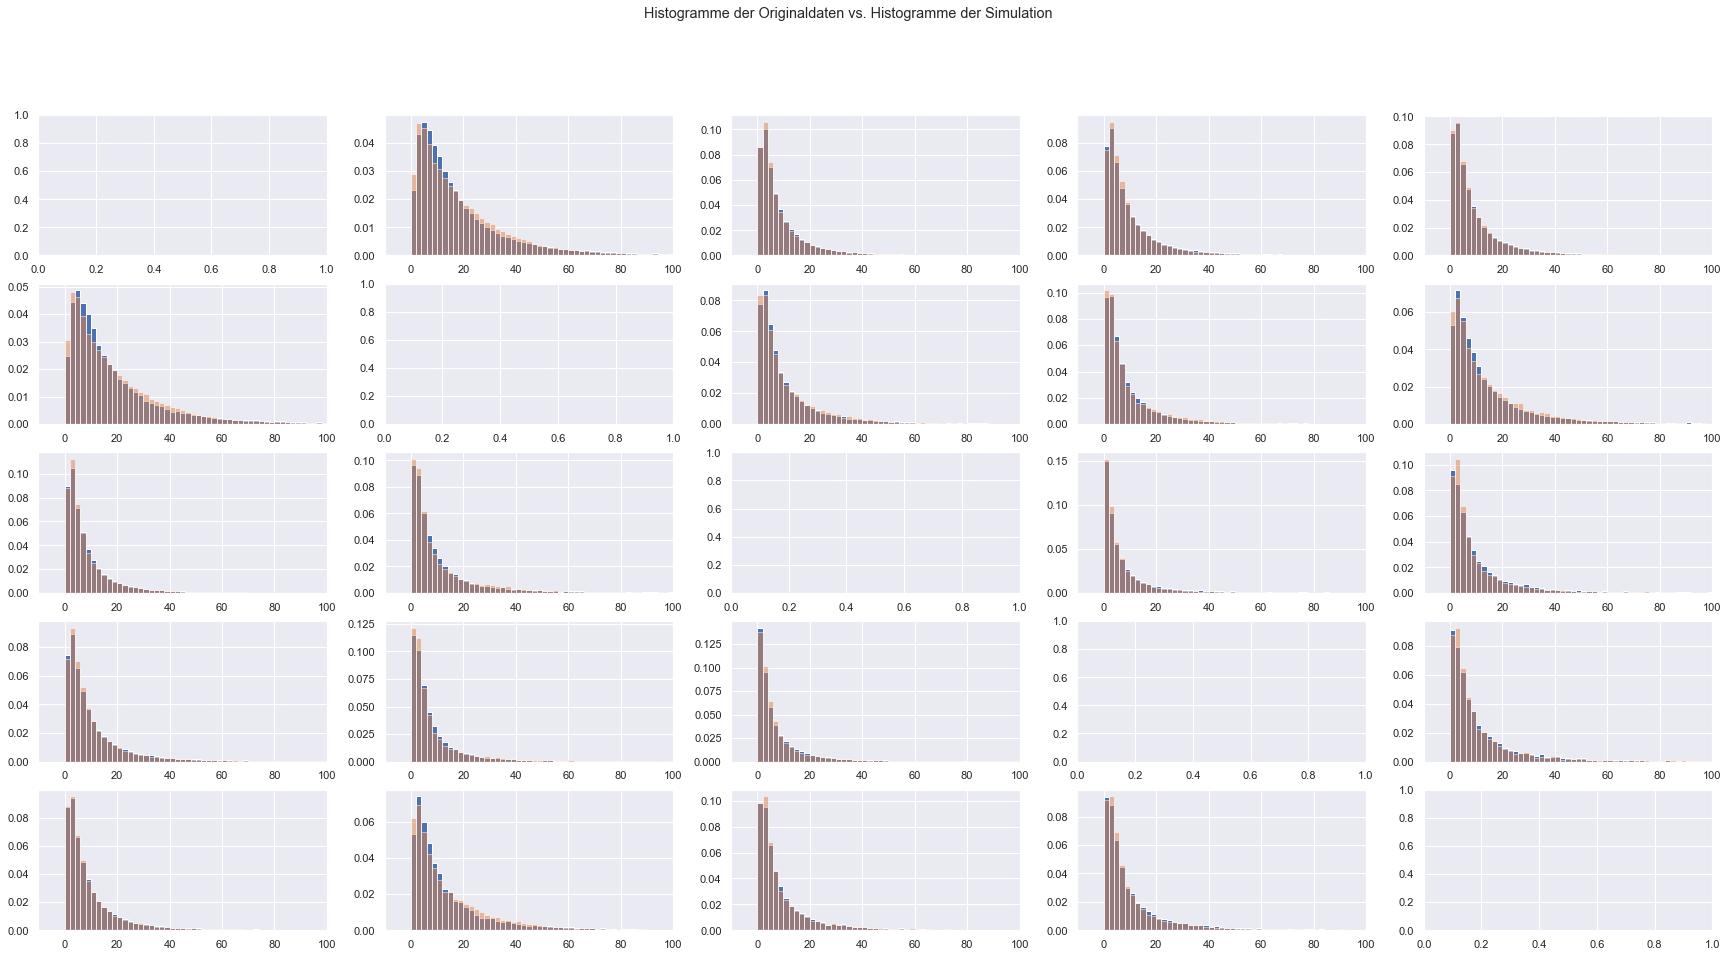

In [14]:
fig, axs = plt.subplots(5, 5, figsize=(30,15))
for i in range(5):
    for j in range(5):
        if i==j:
            continue
        axs[i][j].hist(wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), density=True)
        axs[i][j].hist(orig_wege_ij[i][j], bins=range(int(min(wege_ij[i][j])), int(max(wege_ij[i][j])) + 1, 2), alpha=0.5,  density=True)        
        axs[i][j].set_xlim(-10, 100)
fig.suptitle("Histogramme der Originaldaten vs. Histogramme der Simulation");